# HireArt : Coding Problem 
## by Deepshikha Patni

### PROBLEM STATEMENT :

> The marketing ops team sent over this spreadsheet containing four years of data from a CRM system (please make a copy of the spreadsheet in order to manipulate the data): https://docs.google.com/spreadsheets/d/16hLtx8bBDe2GS1MOa3v9hY6Yhm4C30koLoCpiIJ5WDg/edit?usp=sharing.
The team wants to find the month they're likely to contact the most clients, so they can schedule a product upgrade announcement. Which month does the team tend to contact the greatest percentage of its clients?

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction
> The data is given in spreadsheet in .xslx format and contains four years of data from CRM system. The size of data is 21KB. So, I downloaded it manually in local machine and made a copy of it in form of .csv format to perform data analysis.

> Here, we will be performing Data Analysis of the data given to find the best suitable month for contacting maximum number of clients so as to schedule a product upgrade announcement.

### Preliminary Wrangling
**1) Data Gathering** 
>Downloading .csv data file manually and reading the file as a Dataset.

In [1]:
#importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Downlaoding and reading the .csv data file into a dataset
df = pd.read_csv("HireArt - Data Analyst Exercise 10.12.17 - Sheet1.csv")

In [3]:
#show first five records of the dataset
df.head()

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25


> Now that we have loaded the data, we will assess the data visually and programmatically.

**2) Data Assessing**
> Here I will assess the whole dataset and mention the Quality and Tidiness issues at the end 

In [4]:
#reading the dataframe (visual assessment)
df

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25
...,...,...,...
996,Aidan Pouros,Bosco-Ortiz,2014-04-13
997,Milan Crona,Halvorson LLC,2016-09-16
998,Chauncey Dach,Franecki-Feil,2015-03-21
999,Milan Crona,Abbott Group,2017-09-27


In [5]:
#checking data types, column names, memory usage, etc about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Account manager  1001 non-null   object
 1   Client Name      1001 non-null   object
 2   Date of Contact  1001 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [6]:
# Checking for duplicates in the Data
sum(df.duplicated())

4

In [7]:
#Checking number of unique values in the dataset
df.nunique()

Account manager      4
Client Name         35
Date of Contact    704
dtype: int64

In [8]:
#Checking the dimensions of the dataframes.
df.shape

(1001, 3)

In [9]:
#Confirming total number of null values in each column of the dataset as per the above visualisation
df.isnull().sum()

Account manager    0
Client Name        0
Date of Contact    0
dtype: int64

In [10]:
df.describe()

,Account manager,Client Name,Date of Contact
count,1001,1001,1001
unique,4,35,704
top,Milan Crona,Eichmann and Sons,2013-10-11
freq,286,38,7


**Assessment of Data**

 <ul>
    <li> We found that the data consists of 3 columns with 1001 row entries. </li>
    <li> The data type of 'Date of Contact' column should be datetime instead of object. </li>
    <li> There are 35 unique clients, 4 unique account managers and 704 unique dates in this data set.
    <li> Also it seems that **October** month might have maximum number of client contacted, but lets explore it more to confirm the analysis. </li>
</ul>

**3) Cleaning the Data** 
<ul>
    <li> We need to change the data type of 'Date of Contact' column to **datetime**. </li>
    <li> Also, separating date, day, month and year from Date of Contact column for accurate analysis. </li>
</ul>

In [11]:
#changing data type of date to datetime
df['Date of Contact'] = pd.to_datetime(df['Date of Contact'])

In [12]:
#checking the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Account manager  1001 non-null   object        
 1   Client Name      1001 non-null   object        
 2   Date of Contact  1001 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 23.6+ KB


In [13]:
#Seperating month from 'date of contact' column for better analysis
df.columns = df.columns.str.replace(' ','_')

df['date'] = df.Date_of_Contact.dt.strftime('%Y-%m-%d')
df['day'] = df.Date_of_Contact.dt.strftime('%A')
df['month'] = df.Date_of_Contact.dt.strftime('%B')
df['year'] = df.Date_of_Contact.dt.strftime('%Y')

In [14]:
df.sample()

,Account_manager,Client_Name,Date_of_Contact,date,day,month,year
62,Rigoberto White,Donnelly-Champlin,2016-01-23,2016-01-23,Saturday,January,2016


<a id='eda'></a>
### Exploratory Data Analysis

Now, let's find number of clients contacted Month wise.

In [15]:
#grouping month with client name to find number of clients per month
df_month = df.groupby(['month'])['Client_Name'].count().reset_index().sort_values(['Client_Name'], ascending=False)
df_month

,month,Client_Name
10,October,213
11,September,121
1,August,79
2,December,77
6,June,77
8,May,69
5,July,66
9,November,65
3,February,64
4,January,60


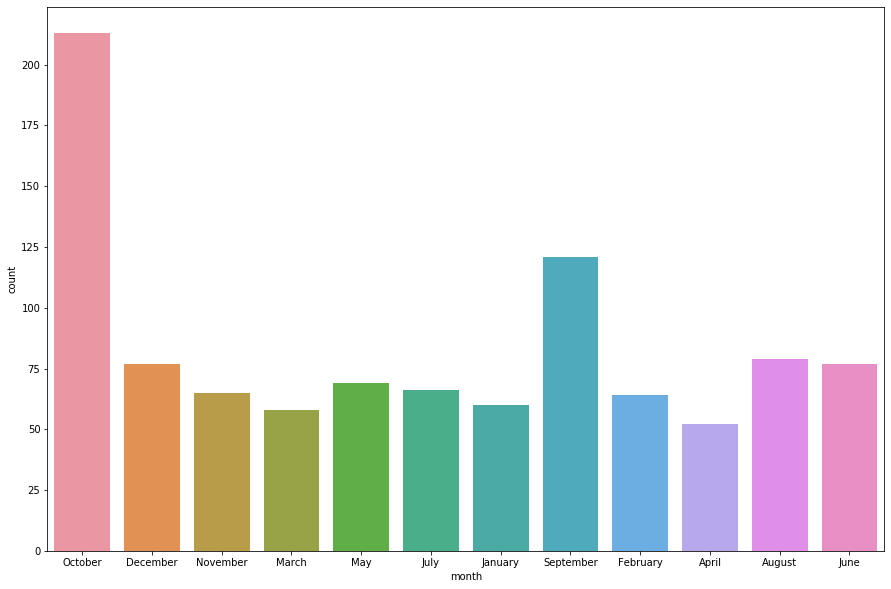

In [16]:
#plotting the above analysis to get better insights 
plt.figure(figsize = (15,10))
ax = sns.countplot(x="month", data=df)

> It is clear from our analysis and visualisation that in October month, maximum clients i.e. 213 count can be targeted for the product launch. 

Lets, explore more to find the maximum unique clients contacted per month to understand whether all unique clients are covered in highest client month i.e. October.

In [17]:
df_unique_clients= df.groupby('month')[('Client_Name')].nunique().reset_index(name='Unique_Clients').sort_values(['Unique_Clients'], ascending=False)
df_unique_clients

,month,Unique_Clients
10,October,35
6,June,34
1,August,33
8,May,33
11,September,33
2,December,32
3,February,31
4,January,30
9,November,30
7,March,29


In [18]:
no_unique_clients_total = df['Client_Name'].nunique()
df_month = df.groupby('month')
no_of_clients = df_month['Client_Name'].nunique()
percent = (no_of_clients/no_unique_clients_total) * 100
print(percent)

month
April         74.285714
August        94.285714
December      91.428571
February      88.571429
January       85.714286
July          80.000000
June          97.142857
March         82.857143
May           94.285714
November      85.714286
October      100.000000
September     94.285714
Name: Client_Name, dtype: float64


> As evident from above analysis, October month has highest number of unique clients. Let's now plot our analysis.

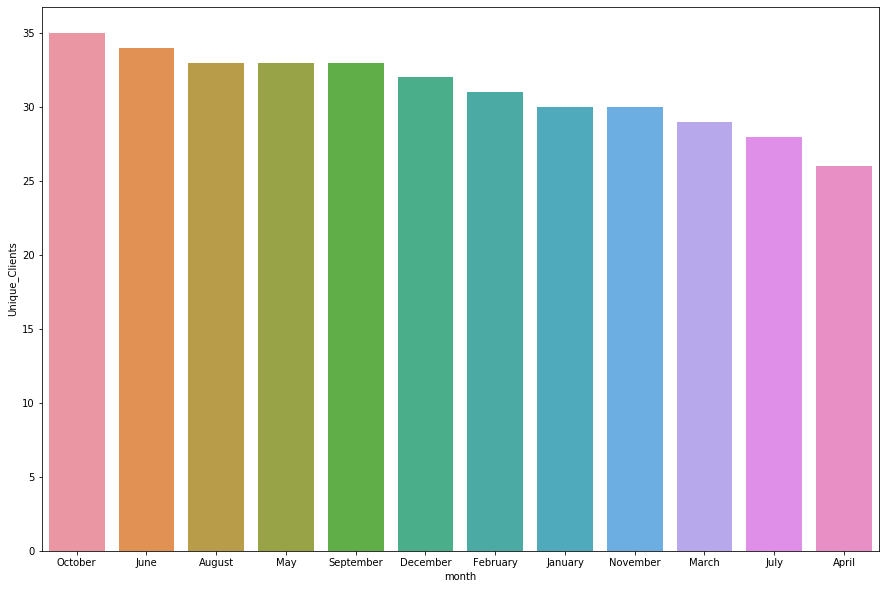

In [19]:
plt.figure(figsize = (15,10))
sns.barplot(x="month", y="Unique_Clients", data=df_unique_clients);

<a id='conclusion'></a>
### Conclusion
> I can conclude that in October month all 35 unique clients are contacted.
> Also it can be inferred from the analysis that to contact maximum number of clients, October is the best suitable month with 100% clients.

**Hence, as per the conclusion drawn from above, team should schedule the product upgrade announcement in October month to reach out to maximum number of clients successfully.** 